In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_folder = 'data/'

In [91]:
df = pd.read_csv(data_folder + 'arxiv-dataset-processed-L1.csv',index_col=0)
categories = pd.read_csv(data_folder + 'categoryL1-label.csv',index_col=0)

In [131]:
print(f"There are {len(df)} rows in the dataset.")
print(f"There are {len(categories)} categories in the dataset.")

There are 77208 rows in the dataset.
There are 8 categories in the dataset.


In [146]:
print(f"There are {sum(df.duplicated())} duplicate rows.")
print(f"There are {sum(df.duplicated(subset='text'))} duplicate texts.")

There are 1038 duplicate rows.
There are 2698 duplicate texts.


In [155]:
# There are some terms with occurrence as low as 1.
print(sum(df["text"].str.split().apply(len).value_counts() == 1))

17


In [151]:
# How many unique terms?
print(df["text"].str.split().nunique())

74510


In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [185]:
v = TfidfVectorizer(min_df=1, max_df=.5,ngram_range=(1,2))
x = v.fit_transform(df['text'])

In [186]:
occ = np.asarray(x.sum(axis=0)).ravel().tolist()

In [175]:
#counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(20)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [47]:
merged = df.merge(categories)

Number of abstract x label

<Axes: xlabel='label', ylabel='Number of rows'>

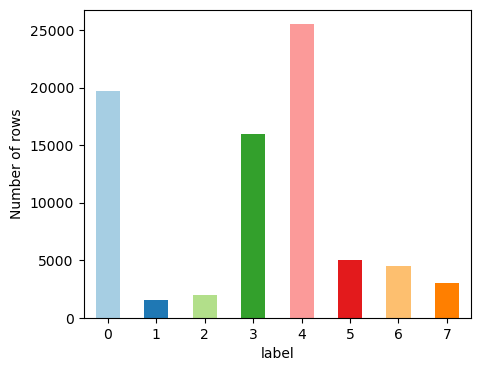

In [59]:
df.groupby(['label']).size().reset_index(name='counts').plot.bar(x='label',
                                                                 y='counts',
                                                                 figsize=(5,4),
                                                                 color=plt.cm.Paired(np.arange(len(df))),
                                                                 legend=False,
                                                                 ylabel = 'Number of abstracts',
                                                                 rot=0
                                                                 )

In [62]:
from wordcloud import WordCloud

wc_prova  = WordCloud().generate(' '.join(df['text']))
plt.imshow(a)
plt.axis("off")
plt.show()

Number of terms x label

In [92]:
df_copy = df.copy()

Add column in each row with amount of word

In [94]:
df_copy['word_counts'] = df_copy['text'].str.count(' ') + 1

Group by label and sum the amount of rows

In [95]:
df_word_amount_label = df_copy.groupby(['label'])['word_counts'].sum().reset_index(name='counts')
df_word_amount_label

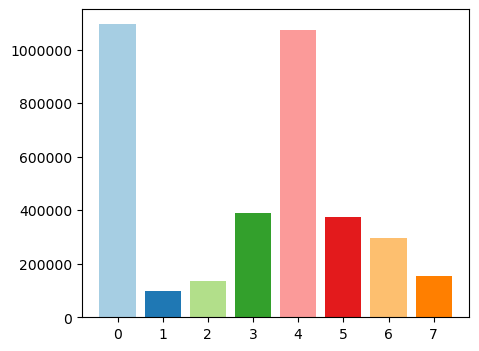

In [130]:
fig = plt.figure(figsize = (5, 4))
plt.bar(df_word_amount_label['label'],
        df_word_amount_label['counts'], 
        color = plt.cm.Paired(np.arange(len(df_word_amount_label))))
plt.ticklabel_format(style='plain')
plt.show()